# Space-time-former Demo|

#### Compute Used
- AWS g4dn.12xlarge with four  NVIDIA T4 GPUs
- Databricks runtime 12.2 LTS ML (GPU Scale 2.12 Spark 3.3.2)

#### Code Branch
- Uses the 'main' branch of 
- The files required the following additional code to append the path to the repo files:
  - 
  - import sys;sys.path.append("/Workspace/Repos/lpenuelacantor@thewaterinstitute.org/spacetimeformer/spacetimeformer")

## Allowing reload source code without killing the kernel.

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
%sh
python -c "import sys; sys.path.append('/Workspace/Repos/lpenuelacantor@thewaterinstitute.org/spacetimeformer/spacetimeformer'); print(sys.path)"


['', '/databricks/spark/python', '/databricks/spark/python/lib/py4j-0.10.9.5-src.zip', '/databricks/jars/spark--driver--driver-spark_3.3_2.12_deploy.jar', '/WSFS_NOTEBOOK_DIR', '/databricks/jars/spark--maven-trees--ml--12.x--graphframes--org.graphframes--graphframes_2.12--org.graphframes__graphframes_2.12__0.8.2-db1-spark3.2.jar', '/databricks/python_shell', '/usr/lib/python39.zip', '/usr/lib/python3.9', '/usr/lib/python3.9/lib-dynload', '/local_disk0/.ephemeral_nfs/envs/pythonEnv-ba350cff-9f56-4e37-b421-ecfc9a719cd2/lib/python3.9/site-packages', '/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages', '/databricks/python/lib/python3.9/site-packages', '/usr/local/lib/python3.9/dist-packages', '/usr/lib/python3/dist-packages', '/databricks/.python_edge_libs', '/Workspace/Repos/lpenuelacantor@thewaterinstitute.org/spacetimeformer/spacetimeformer']


In [ ]:
import os
# Let source code know where to store log files
# Add a new environment variable 
os.environ['STF_LOG_DIR'] = '/Workspace/Repos/lpenuelacantor@thewaterinstitute.org/spacetimeformer/logs'

# Exploring spacetimeformer options for the asos datase

In [ ]:
%sh
python spacetimeformer/train.py spacetimeformer asos --help

2023-06-09 21:53:33.740149: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-09 21:53:34.404812: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
usage: train.py [-h] [--data_path DATA_PATH] [--context_points CONTEXT_POINTS]
                [--target_points TARGET_POINTS]
                [--time_resolution TIME_RESOLUTION] [--batch_size BATCH_SIZE]
                [--workers WORKERS] [--overfit] [--gpus GPUS [GPUS ...]]
                [--l2_coeff L2_COEFF] [--learning_rate LEARNING_RA

In [ ]:
from spacetimeformer import train as sp_train

In [ ]:
##Original dataset
parser = sp_train.create_parser_cl("spacetimeformer","asos")
args = parser.parse_args("spacetimeformer asos --context_points 160 --target_points 40 --start_token_len 8 --grad_clip_norm 1 --gpus 0 1 2 3 --batch_size 128 --d_model 200 --d_ff 800 --enc_layers 3 --dec_layers 3 --local_self_attn none --local_cross_attn none --l2_coeff .01 --dropout_emb .1 --run_name temporal_asos_160-40-original --loss smape --time_resolution 1 --dropout_ff .2 --n_heads 8 --trials 3 --embed_method temporal --attn_plot --mlflow --workers 6".split(" "))

In [ ]:
#Our dataset
parser = sp_train.create_parser_cl("spacetimeformer","asos")
args = parser.parse_args("spacetimeformer asos --context_points 16 --target_points 4 --start_token_len 2 --grad_clip_norm 1 --gpus 0 --batch_size 1 --d_model 200 --d_ff 800 --enc_layers 3 --dec_layers 3 --local_self_attn none --local_cross_attn none --l2_coeff .01 --dropout_emb .1 --run_name temporal_asos_160-40-mse2 --loss smape --time_resolution 1 --dropout_ff .2 --n_heads 8 --trials 1 --embed_method temporal --attn_plot --mlflow --workers 6".split(" "))


### Training Model

In [ ]:
## Getting predicted and real values from training
yt_pred,test_samples = sp_train.main(args)

Namespace(model='spacetimeformer', dset='asos', data_path='auto', context_points=160, target_points=40, time_resolution=1, batch_size=128, workers=6, overfit=False, gpus=[0, 1, 2, 3], l2_coeff=0.01, learning_rate=0.0001, grad_clip_norm=1.0, linear_window=0, use_revin=False, loss='smape', linear_shared_weights=False, use_seasonal_decomp=False, start_token_len=8, d_model=200, d_qk=200, d_v=200, n_heads=8, enc_layers=3, dec_layers=3, d_ff=800, attn_factor=5, dropout_emb=0.1, dropout_attn_matrix=0.0, dropout_qkv=0.0, dropout_ff=0.2, dropout_attn_out=0.0, global_self_attn='performer', global_cross_attn='performer', local_self_attn='none', local_cross_attn='none', activation='gelu', norm='batch', init_lr=1e-10, base_lr=0.0005, warmup_steps=0, decay_factor=0.25, initial_downsample_convs=0, class_loss_imp=0.1, recon_loss_imp=0.0, intermediate_downsample_convs=0, time_emb_dim=6, performer_kernel='relu', performer_redraw_interval=100, embed_method='temporal', attn_time_windows=1, use_shifted_tim

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:287: LightningDeprecationWarning: Passing `Trainer(accelerator='dp')` has been deprecated in v1.5 and will be removed in v1.7. Use `Trainer(strategy='dp')` instead.
  rank_zero_deprecation(
/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/pytorch_lightning/loops/utilities.py:91: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(limit_val_batches=1.0)` was configured so 100% of the batches will be used..
`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name    

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Restoring states from the checkpoint path at /Workspace/Repos/lpenuelacantor@thewaterinstitute.org/spacetimeformer/logs/temporal_asos_160-40-original_8c6c4fd2/temporal_asos_160-40-originalepoch=04.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
Loaded model weights from checkpoint at /Workspace/Repos/lpenuelacantor@thewaterinstitute.org/spacetimeformer/logs/temporal_asos_160-40-original_8c6c4fd2/temporal_asos_160-40-originalepoch=04.ckpt


test_dataloader
889


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test/acc                   -1.0
     test/class_loss                0.0
   test/forecast_loss       57.069801330566406
        test/loss           57.069801330566406
        test/mae             2.739312769372856
        test/mape           201682.06456152696
        test/mse            14.131619975371624
      test/norm_mae         0.2664089643438297
      test/norm_mse         0.13263147216388865
     test/recon_loss               -1.0
       test/smape           0.3594648825754244
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [ ]:
xc, yc, xt, yreal = test_samples
print("x context shape",xc.numpy().shape)
print("y context shape",yc.numpy().shape)
print("x target shape",xt.numpy().shape)
print("y target predicted shape",yt_pred.numpy().shape)
print("y target real shape",yreal.numpy().shape)

x context shape (128, 160, 6)
y context shape (128, 160, 6)
x target shape (128, 40, 6)
y target predicted shape (128, 40, 6)
y target real shape (128, 40, 6)


## Saving and graphing results

In [ ]:
import numpy as np
np.savez(f'/Workspace/Users/lpenuelacantor@thewaterinstitute.org/spacetimeformer_asos_original.npz', ycontext=yc.numpy(), yreal=yreal.numpy(),ypred=yt_pred.numpy(),xcontext=xc.numpy(),xtarget=xt.numpy())

In [ ]:
xcontext = xc.numpy()
ycontext =yc.numpy()
xtarget = xt.numpy()
ytarget_real = yreal.numpy()
ytarget_predicted = yt_pred.numpy()

In [ ]:
xcontext_median = np.mean(xcontext,axis=0)
ycontext_median = np.mean(ycontext,axis=0)
xtarget_median = np.mean(xtarget,axis=0)
ytarget_real_median = np.mean(ytarget_real,axis=0)
ytarget_predicted_median = np.mean(ytarget_predicted,axis=0)

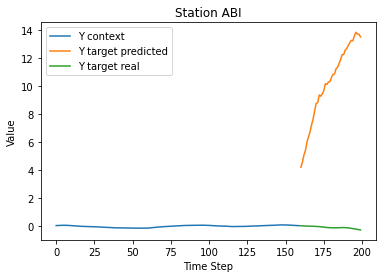

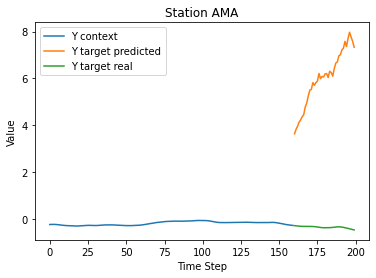

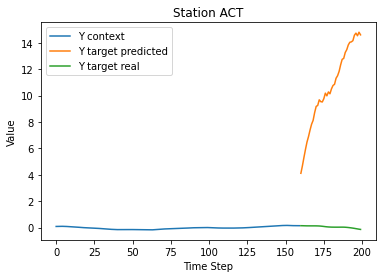

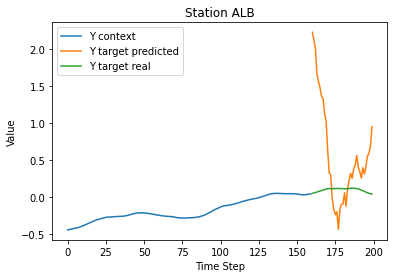

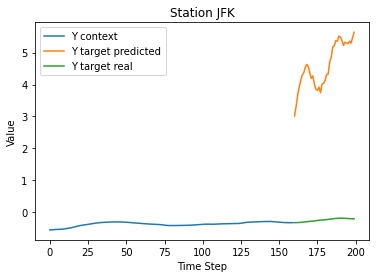

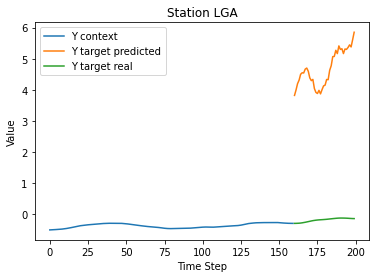

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
num_steps, num_features = xcontext_median.shape
#stations = ['Avg_ALH', 'Avg_BEL', 'Avg_BRF', 'Avg_FRV', 'Avg_GOU', 'Avg_GRA']
stations = ["ABI", "AMA", "ACT", "ALB", "JFK", "LGA"]
for feature_index in range(num_features):
    # Create a new plot for the current dimension
    plt.figure()
    
    # Create an array for the x-axis values
    x_values = np.arange(num_steps + ytarget_predicted_median.shape[0])
    
    # Plot the Y context
    plt.plot(x_values[:num_steps], ycontext_median[:, feature_index], label='Y context')

    # Plot the Y target predicted
    plt.plot(x_values[num_steps:], ytarget_predicted_median[:, feature_index], label='Y target predicted')

    # Plot the Y target real
    plt.plot(x_values[num_steps:], ytarget_real_median[:, feature_index], label='Y target real')

    # Set the labels and title
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.title(f'Station {stations[feature_index]}')
    plt.legend()